<a href="https://colab.research.google.com/github/VanshikaNehra23/STC_DS_Tasks/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Loading the dataset from the inbuild datasets of Tensorflow:

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.



In [ ]:
x_train.shape

(60000, 28, 28)

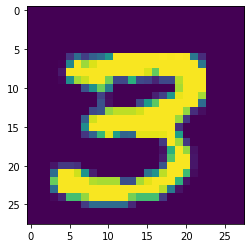

In [ ]:
plt.imshow(x_train[111])

In [ ]:
x_train[1].shape

(28, 28)

In [ ]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Normalizing the values:

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Building the Model :

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit() does the iterative approach that we have discussed and finds the best value for weights.

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4422 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1224 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0846 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0593 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0438 - accuracy: 0.9860


We Check how well the model is performing on the unseen data with model.evaluate()

In [ ]:
model.evaluate(x_test,  y_test, verbose=1)

313/313 [==============================] - 1s 1ms/step - loss: 0.0753 - accuracy: 0.9771


[0.07534895837306976, 0.9771000146865845]

Importing ComputerVision library to transform our image into the required size

In [ ]:
import cv2

In [ ]:
def get_img(img_path, printer=True):
  original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  if printer: print ("original dim:",original_img.shape)

  resized_img = cv2.resize(original_img, (28,28))
  if printer: print ("resized dim:", resized_img.shape)

  return resized_img

original dim: (58, 52)
resized dim: (28, 28)


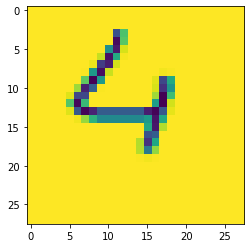

In [ ]:
img_path = "/content/msedge_SLT5DW1gqg.png"
resized_img = get_img(img_path)
plt.imshow(resized_img)

In [ ]:
resized_img= np.expand_dims(resized_img, axis=0)

In [ ]:
resized_img.shape

(1, 28, 28)

In [ ]:
pre=model.predict(resized_img)

In [ ]:
np.argmax(pre)

3

In [ ]:
pre

array([[  218124.4 , -1275630.1 ,   594411.8 ,   731119.5 , -2001964.2 ,
           75792.94,  -764327.44,  -636515.3 ,   266127.97,  -971998.94]],
      dtype=float32)